In [6]:
%pip install PySimpleGUI

     |████████████████████████████████| 512 kB 9.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,'./modules')
from data_viewer import *
from duplicate_finder import *
from data_reader import *

from sklearn.metrics.pairwise import *
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import DistanceMetric

In [11]:
def get_ind(A, I, J):
    max_i, max_j = -1, -1
    max_val = -1e6
    for i in I:
        for j in J:
            val = A[i,j]
            if(val>max_val):
                max_val = val
                max_i, max_j = i, j
    return max_i, max_j


def VAT(D):
    n = D.shape[0]
    K = set(range(n))
    P = np.zeros((n,), dtype=int)
   
    #init
    i,_ = get_ind(D,K,K)
    P[0] = i
    I, J = set([i]), K - set([i])
    for r in range(1, n):
        i,j = get_ind(-D,I,J)
        P[r] = j
        I = I | set([j])
        J = J - set([j])
   
    D_new = np.zeros_like(D)
    for i in range(n):
        for j in range(n):
            D_new[i,j] = D[P[i],P[j]]
    return D_new


def make_remove_list(tuples, n_rows, start_row=3):
    remove = []
    for elem in tuples:
        if elem[0] not in remove:
            remove.append(elem[1])
    remove = np.unique(remove)
    keep = [i for i in range(n_rows) if i not in remove]
    
    return start_row + np.array(keep), start_row + remove

def tuples2list(tuples, start_row=3):
    result=np.zeros((2*len(tuples),))
    i=0
    for elem in tuples:
        result[i]=elem[0]
        result[i+1]=elem[1]
        i+=2
    return np.unique(result) + start_row

def unique(x, atol=0, rtol=0):
    if(tol==0):
        return np.unique(x, return_index=True, return_counts=True)
    n = x.shape[0]
    indices, counts = [], [] 
    for i in range(n-1):
        for j in range(i+1,n):
            pass

In [9]:
np.isclose(3,3.0001, )

False

In [12]:
path = '../../PDproj/celldata/clean/'
filenames = [line.rstrip() for line in open(path +'filenames.txt')]
filenames

['cellsAllModes.csv',
 'cellshilicneg_log2.csv',
 'cellshilicpos_log2.csv',
 'cellslipidomicsneg_log2.csv',
 'cellslipidomicspos_log2.csv',
 'cellsRPneg_log2.csv',
 'cellsRPpos_log2.csv',
 'mediumHILICneg_log2.csv',
 'mediumHILICpos_log2.csv',
 'mediumRPneg_log2.csv',
 'mediumRPpos_log2.csv']

In [50]:
filenum = 4
file = filenames[filenum]
df=pd.read_csv(path+file, sep=';').iloc[2:,:]
df=df.iloc[np.argsort(np.asarray(df['Unnamed: 5'],dtype=float)),:]
data = read_file(file, path)
data.head()

,0,1,4,5,8,9,10,11,12,13,...,38,39,40,41,42,43,44,45,46,47
3,Locustol,C9 H12 O2,153.09103,3.196,21.5121549448339,21.4746055343211,21.3663447731721,21.9419198360859,21.7841672464102,21.7267959993647,...,21.308044881936,21.7245216015449,21.6292650464469,22.0231531260167,21.9426964137303,21.2713111063914,21.6074902185448,21.4169468102385,21.8943911629971,21.3672395225328
4,"2,6-Dioxo(4-~14~C)-1,2,3,6-tetrahydro-4-pyrimi...",C4 [14]C H4 N2 O4,159.02778,0.643,19.907024097623,19.8469039901301,17.9651048486987,19.8670541928268,17.4177416429577,16.1218997439365,...,19.3230595530306,16.4559465651049,18.8605503575636,19.5323735697553,17.8498050793163,16.1039287915096,16.7310567331204,17.0202763827131,17.3905257336149,18.8759688440033
5,CZ1330000,C12 H16,161.13245,3.12,19.9722906785243,19.9116746480112,19.9468528686562,20.3303276587114,20.230805049614,20.1087318898849,...,19.5394003994456,20.176466867625,20.283129315971,20.4502150949119,20.3716689323809,19.3258624221143,20.1257339449893,19.5237829530845,20.2281149772137,19.5858034364691
6,CZ1330000,C12 H16,161.13246,2.829,19.1923060936591,19.275862300872,18.9183270119345,19.5695876656286,19.5052061609909,19.160747073025,...,18.9314695863752,19.0689029316911,19.5817359946008,19.7480604024976,19.5365637993215,18.8683790390985,19.4654087145048,19.0538383179703,19.5748827365232,19.1453376011097
7,L(-)-Carnitine,C7 H15 N O3,162.11248,0.726,22.1160901230499,21.8705301530116,20.9633186466802,21.7786767430348,21.4845397838156,21.0395502524374,...,21.4808611275203,21.1166942220907,20.8396295244498,21.8400849286758,20.9239815684862,23.6292411204615,24.1601680127596,24.4037871818656,23.8902125413596,24.8345038553007


In [68]:
df.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,aSYN,aSYN.1,...,UT,UT.1,UT.2,UT.3,UT.4,UT.5,UT.6,UT.7,UT.8,UT.9
368,NaN,C19 H41 N O6,-0.41,379.29323,380.30051,0.618,DDA for preferred ion,[M+H]+1,19.6056857993136,19.5861508329,...,20.4023314273868,19.6678645219128,19.4317154306203,20.3009499494974,19.610685630454,19.7814806936473,19.3773917734652,21.004976345703,20.0500638795862,20.1415712994541
305,NaN,C13 H15 N4 O4 P S,2.84,354.05617,355.06344,0.619,No MS2,[M+H]+1,17.4071040157892,17.4389527684847,...,17.0950213054965,16.8417610224524,16.6948785610362,17.0935578044657,16.2133244130899,18.7004097694284,18.5207326964984,17.8495472158052,17.6465849624247,17.9733181527235
188,"1-(3-Azido-2,3-dideoxypentofuranosyl)-5-methyl...",C10 H13 N5 O4,-0.06,267.09674,268.10402,0.623,No MS2,[M+H]+1,20.5222948854963,20.7337065355506,...,20.5791436654114,19.015000150341,19.760331176383,20.2685657736341,19.2805230557466,19.306186426784,19.8487242445459,20.3858867312003,19.0160431738979,21.4795649736328
323,N1-(1-benzyl-4-piperidyl)-4-chlorobenzene-1-su...,C18 H21 Cl N2 O2 S,-60381.66,342.11619,365.10538,0.625,DDA for other ion,[M+Na]+1,17.9420443251408,17.0834079643705,...,17.2495886185369,16.3498546451581,16.1351022210885,17.1826155738197,15.4636018600155,17.7794825373238,16.6550742146819,16.8638641397075,17.8675634179545,19.2240310011959
347,NaN,C18 H34 N4 O4,-0.23,370.25792,371.26521,0.628,DDA for preferred ion,[M+H]+1,19.1949161599823,19.4461505113218,...,19.4682829398952,18.4019035633622,18.7789939097364,18.8715197860722,19.0328483420224,18.7602366477719,18.5900388273171,18.7129181825451,18.3433624430479,18.4833724045382
349,NaN,C18 H33 N3 O5,-0.3,371.24191,372.2492,0.629,DDA for preferred ion,[M+H]+1,17.4983513390109,17.816697971724,...,18.2043538077871,16.2337865227673,16.4603141279504,16.7486317665723,17.5697652100818,16.8069227657276,17.0476441226161,17.0971317770426,15.8325142282335,16.0923312524287
176,"(3E)-2-({[(2R)-2,4-Dihydroxy-3,3-dimethylbutan...",C12 H22 N2 O4,-0.38,258.15786,259.16516,0.63,DDA for preferred ion,[M+H]+1,17.341489359475,17.8293153650887,...,17.7973499980249,16.1231818318074,16.0053071913111,16.9331346439322,17.12201625391,16.4842506715733,17.3162298839625,16.7322036015748,14.9031877910166,15.9641835001229
3,"2,6-Dioxo(4-~14~C)-1,2,3,6-tetrahydro-4-pyrimi...",C4 [14]C H4 N2 O4,0.96,158.0205,159.02778,0.643,DDA for preferred ion,[M+H]+1,19.907024097623,19.8469039901301,...,19.3230595530306,16.4559465651049,18.8605503575636,19.5323735697553,17.8498050793163,16.1039287915096,16.7310567331204,17.0202763827131,17.3905257336149,18.8759688440033
263,MM3670000,C12 H26 O7,-0.38,282.16775,321.13083,0.646,DDA for other ion,[M+K]+1,18.8674867586987,18.7331841936785,...,18.6865414232901,19.4456724176308,18.9949438745695,18.2360930128464,18.2727995061119,18.8167759636557,19.2188047318562,19.2131291765049,18.9922541225256,18.7426924993162
581,NaN,C35 H41 N3 O,2.15,519.32608,520.33336,0.647,No MS2,[M+H]+1,17.7916802104684,17.6385838034643,...,17.2034942010642,17.8145282637218,17.7495770751902,16.959211874638,17.4148675706931,18.1522494143739,17.7712373882677,18.3551430115836,17.5365092538021,17.6520175736606


### Group by RTime

- retention time can vary in the 1st decimal (in RP mode difference <=0.1min, in HILIC 0.2 or even 0.3)

In [ ]:
def sliding_selector(t, window, step):
    

In [52]:
data = pd.read_csv(path + file, sep=';', header=None).drop([0,1,2],axis=0).drop([2,3,6,7],axis=1)
data=data.iloc[np.argsort(np.asarray(data[4],dtype=float)),:]
data.index = range(data.shape[0])

In [53]:
RT=np.asarray(data[5],dtype=float)

In [54]:
D_RT=np.abs(RT[:,np.newaxis]-RT[np.newaxis,:])

In [65]:
np.sum(D_RT[6,:]<=0.01)

20

In [25]:
RT.shape[0]-np.unique(RT).shape[0]

22

In [101]:
vals, inds, counts=np.unique(RT, return_index=True, return_counts=True)

In [104]:
target=inds[np.where(counts>1)]

In [105]:
vals[np.where(counts>1)]

array([ 0.608,  0.609,  0.61 ,  0.611,  0.612,  0.613,  0.614,  0.619,
        0.68 ,  0.688,  0.697,  0.699,  0.705,  0.759, 13.855, 14.011,
       14.017, 14.019, 14.023, 14.109, 14.154, 14.191, 14.638, 14.639,
       14.64 , 14.652, 14.666, 14.806, 14.837, 14.841, 14.843, 14.896,
       14.953, 15.058, 15.153, 15.16 , 15.209, 15.232, 15.287, 15.288,
       15.291, 15.296, 15.298, 15.386, 15.412, 15.413, 15.434, 15.438,
       15.508, 15.509, 15.51 , 15.511, 15.513, 15.518, 15.542, 15.549,
       15.765, 15.776, 15.796, 15.801, 15.803, 15.862, 15.889, 15.89 ,
       15.948, 15.949, 15.95 , 15.954, 16.025, 16.077, 16.088, 16.103,
       16.114, 16.115, 16.131, 16.14 , 16.141, 16.143, 16.17 , 16.213,
       16.227, 16.336, 16.359, 16.369, 16.373, 16.374, 16.375, 16.377,
       16.449, 16.482, 16.485, 16.493, 16.501, 16.565, 16.579, 16.582,
       16.618, 16.695, 16.762, 16.764, 16.765, 16.807, 16.825, 16.826,
       16.893, 17.037, 17.05 , 17.07 , 17.082, 17.107, 17.11 , 17.111,
      

In [126]:
k=18
clust=data.iloc[np.where(RT==RT[target[k]])[0],4:].to_numpy(dtype=float)
np.corrcoef(clust)

array([[1.        , 0.78091424],
       [0.78091424, 1.        ]])

### ------------------------------------------------------------------------------------------------------------

In [5]:
indices1, mt_pairs1 = get_VAL_duplicates(data, 0.4)
indices2, mt_pairs2 = get_MT_duplicates(data,0.002,0.1)

In [37]:
keep=tuples2list(indices2,0)

In [49]:
deltamass=np.asarray(df.iloc[keep,2],dtype=float)

In [72]:
tmp=np.where(np.abs(deltamass)>1000)[0]
df_tmp=df.iloc[keep,:].iloc[tmp,:].sort_values(by='Unnamed: 4')
x=df_tmp.iloc[:,8:].to_numpy(dtype=float)
x.shape

(6, 40)

(array([ 1.,  2.,  3.,  6.,  2.,  5.,  1.,  3., 10.,  7.]),
 array([24.01262441, 24.26824488, 24.52386535, 24.77948583, 25.0351063 ,
        25.29072677, 25.54634724, 25.80196771, 26.05758819, 26.31320866,
        26.56882913]),
 <BarContainer object of 10 artists>)

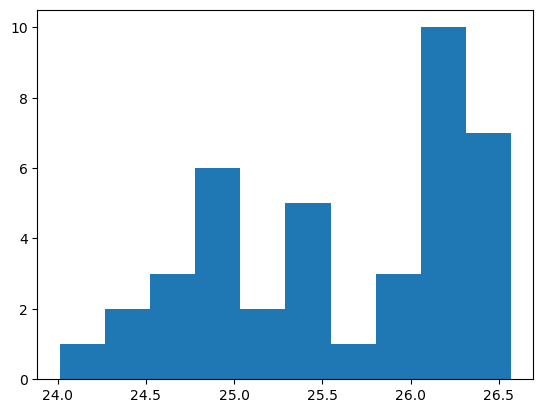

In [78]:
plt.hist(x[5,:])

In [35]:
df.iloc[keep,:].sort_values(by='Unnamed: 4').head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,aSYN,aSYN.1,...,UT,UT.1,UT.2,UT.3,UT.4,UT.5,UT.6,UT.7,UT.8,UT.9
60,(S)-2-Amino-3-hydroxypropanoate,C3 H6 N O3,6.55,104.03545,105.04273,4.224,DDA for preferred ion,[M+H]+1,24.8163863067417,25.2765540099364,...,24.594487532949,22.712184214368,24.8330528994885,24.2914869892811,24.4723870943974,24.2489927516036,23.5990485093634,24.3913161649426,24.1899463833101,24.6628881525979
138,Diethanolamine,C4 H11 N O2,4.33,105.07943,106.08671,3.069,DDA for preferred ion,[M+H]+1,23.1324030316658,22.9550018799161,...,23.5522632374645,23.6811714184276,23.6229017998923,23.7829420950311,23.6876803303289,23.6656689222348,23.7184395410264,23.7535028305667,23.8150928788737,23.6582411579004
19,Proline,C5 H9 N O2,3.14,115.06369,116.07097,4.86,DDA for preferred ion,[M+H]+1,25.0826569572388,25.1751257185128,...,24.6673498528837,24.6024215655586,25.0084256854539,24.1739435337945,24.6453365167449,24.1889046157505,24.7996508776299,24.5145258277565,24.1147604520049,24.4546182284915
210,"2-amino-1,3,4-butanetriol",C4 H11 N O3,2.58,121.07421,122.08148,6.282,DDA for preferred ion,[M+H]+1,20.7543440498306,20.8919936106253,...,21.0097571120027,20.0607365254874,20.1944557039888,20.7633500545761,20.0776450162776,20.5796870255816,20.1190206356544,19.8820158860122,20.793531976753,20.8521812664373
108,NaN,C4 H6 N P S,1.51,130.99605,132.00333,4.24,DDA for preferred ion,[M+H]+1,24.534934781182,24.8876122968489,...,24.1573733204579,23.9747548070955,24.2127846190831,23.4409467149335,23.6968080859774,23.4249223916461,23.5181672116013,23.5419628201202,23.2083121009701,23.9253028280977


In [9]:
keep, remove=make_remove_list(indices1, data.shape[0],0)
X_purged = data.iloc[keep,4:].to_numpy(dtype=float).T
X_orig = data.iloc[:,4:].to_numpy(dtype=float).T

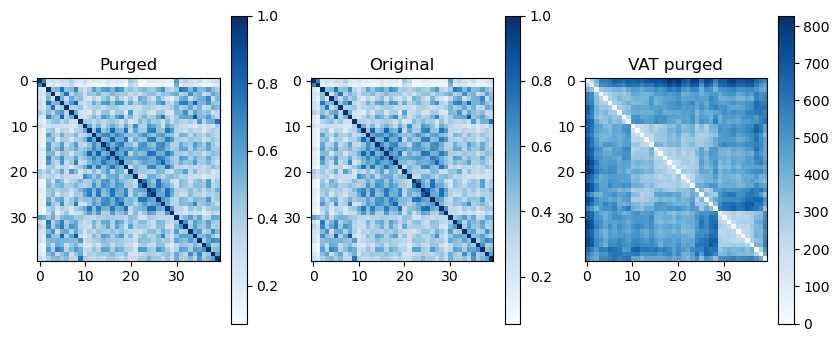

In [10]:
kernel = lambda x: rbf_kernel(x,gamma=0.001)
dist = lambda x, metric: pairwise_distances(x, metric=metric)

S1 = kernel(X_purged)
S2 = kernel(X_orig)
S3 = VAT(dist(X_purged,'manhattan'))
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(10, 4), ncols=3)

pos1 = ax1.imshow(S1, cmap='Blues', interpolation='none')
fig.colorbar(pos1, ax=ax1)
ax1.set_title('Purged')

pos2 = ax2.imshow(S2, cmap='Blues', interpolation='none')
fig.colorbar(pos2, ax=ax2)
ax2.set_title('Original')

pos3 = ax3.imshow(S3, cmap='Blues', interpolation='none')
fig.colorbar(pos3, ax=ax3)
ax3.set_title('VAT purged')
plt.show()

In [18]:
pca_orig = PCA(n_components=10).fit_transform(X_orig)
pca_purged = PCA(n_components=10).fit_transform(X_purged)

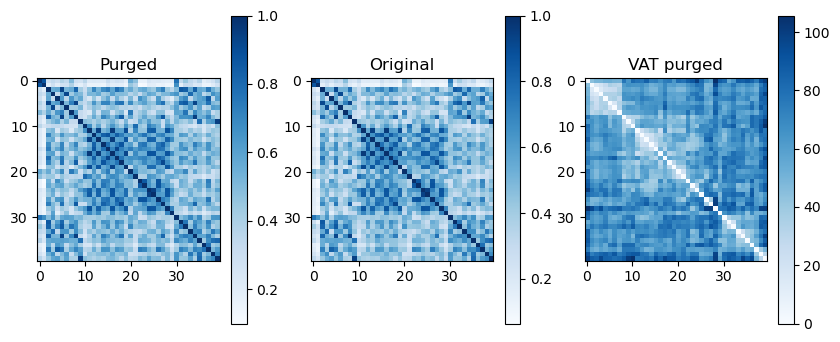

In [27]:
kernel = lambda x: rbf_kernel(x,gamma=0.001)
dist = lambda x, metric: pairwise_distances(x, metric=metric)

S1 = kernel(pca_purged)
S2 = kernel(pca_orig)
S3 = VAT(dist(pca_purged,'manhattan'))
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(10, 4), ncols=3)

pos1 = ax1.imshow(S1, cmap='Blues', interpolation='none')
fig.colorbar(pos1, ax=ax1)
ax1.set_title('Purged')

pos2 = ax2.imshow(S2, cmap='Blues', interpolation='none')
fig.colorbar(pos2, ax=ax2)
ax2.set_title('Original')

pos3 = ax3.imshow(S3, cmap='Blues', interpolation='none')
fig.colorbar(pos3, ax=ax3)
ax3.set_title('VAT purged')
plt.show()

In [49]:
k=2
kmeans_orig = KMeans(n_clusters=k).fit(pca_orig)
kmeans_pruned = KMeans(n_clusters=k).fit(pca_purged)

Text(0.5, 1.0, 'Ground truth')

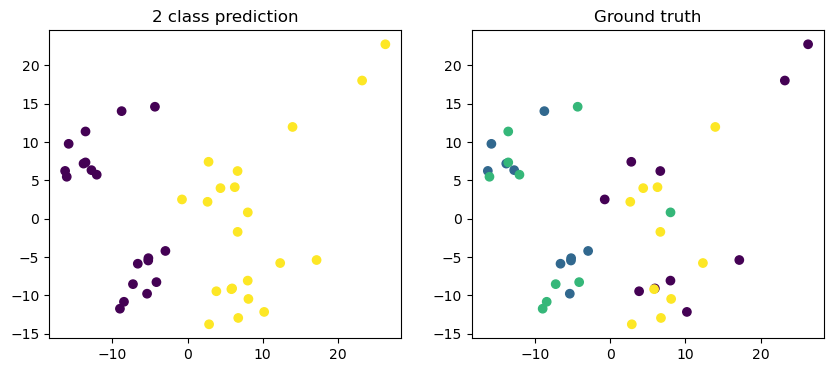

In [73]:
el1,el2=0,1
labels=np.array([np.ones((10,)),2*np.ones((10,)),3*np.ones((10,)),4*np.ones((10,))])
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(pca_orig[:,el1],pca_orig[:,el2],c=kmeans_orig.predict(pca_orig))
plt.title('2 class prediction')
plt.subplot(1,2,2)
plt.scatter(pca_orig[:,el1],pca_orig[:,el2],c=labels)
plt.title('Ground truth')

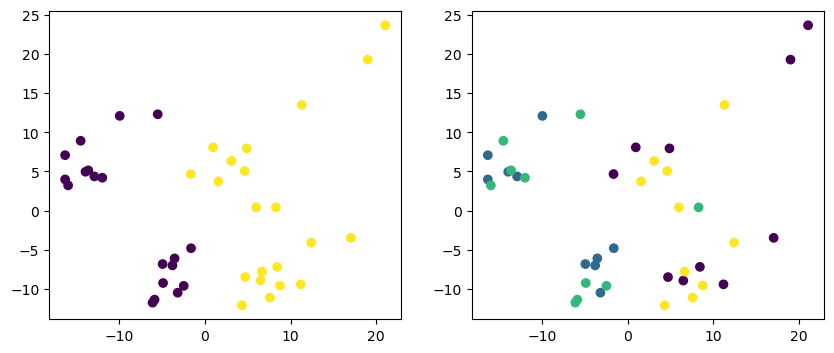

In [71]:
el1,el2=0,1
labels=np.array([np.ones((10,)),2*np.ones((10,)),3*np.ones((10,)),4*np.ones((10,))])
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(pca_purged[:,el1],pca_purged[:,el2],c=kmeans_pruned.predict(pca_purged))
plt.subplot(1,2,2)
plt.scatter(pca_purged[:,el1],pca_purged[:,el2],c=labels)

SIMILARITY: 0.0
----------------
3-methyl-5-oxo-5-(4-toluidino)pentanoic acid
C13 H17 N O3
258.11011
6.206
----------------
Choline Alfoscerate
C8 H20 N O6 P
258.11011
6.266
----------------



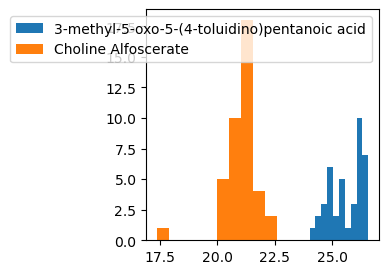

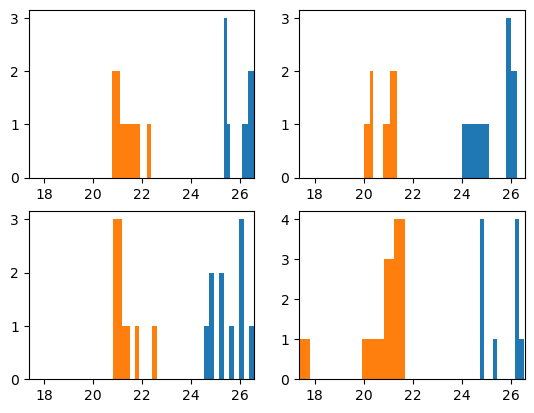

In [69]:
x=indices2
k=29
a,b=array_pair(data, x[k])
plt.figure(figsize=(3,3))
report_pair(a,b,x[k],data)
group_hist(a,b)

In [81]:
for i,elem in enumerate(mt_pairs1):
    print(str(i) + ': ' + elem[0] + ' - ' + elem[1])

0: 84.045@6.393 - 84.04504@6.393
1: 182.08136@5.135 - 182.08138@5.135
2: 188.17582@6.192 - 188.17585@6.192
3: 198.18541@0.387 - 198.18543@0.393
4: 200.16465@0.432 - 200.16469@0.433
5: 205.09724@4.043 - 205.09735@4.052
6: 206.88602@2.954 - 206.88606@2.956
7: 214.1803@0.425 - 214.18033@0.427
8: 219.11294@0.719 - 219.11298@0.718
9: 228.19598@0.424 - 228.196@0.423
10: 244.19083@0.387 - 244.19083@0.388
11: 249.16975@0.429 - 250.17781@0.424
12: 269.22639@0.39 - 269.2265@0.392
13: 272.22198@0.443 - 272.22205@0.442
14: 306.1911@0.389 - 306.19113@0.389
15: 334.22234@0.384 - 334.22242@0.384
16: 352.30562@0.402 - 352.30597@0.401
17: 369.35163@0.387 - 369.35187@0.386
18: 380.33701@0.4 - 380.33734@0.396
19: 398.37393@0.394 - 398.37445@0.392
20: 408.36815@0.434 - 408.36829@0.435
21: 419.35184@0.386 - 419.35186@0.381
22: 423.35794@0.419 - 424.36327@0.4
23: 444.05645@3.159 - 446.05344@3.157
24: 468.3085@0.467 - 468.3085@0.464
25: 492.32366@0.403 - 492.32377@0.403
26: 496.33969@0.461 - 496.3397@0.461
2

In [82]:
for i,elem in enumerate(mt_pairs2):
    print(str(i) + ': ' + elem[0] + ' - ' + elem[1])

0: 76.03997@5.94 - 76.04@5.941
1: 79.0219@0.652 - 79.0219@0.586
2: 84.045@6.393 - 84.04504@6.393
3: 90.05553@5.664 - 90.05554@5.61
4: 123.05559@0.665 - 123.05561@0.592
5: 130.05006@6.277 - 130.05011@6.275
6: 132.07693@5.595 - 132.07694@5.659
7: 150.05518@0.576 - 150.05519@0.493
8: 176.07415@1.063 - 176.07416@0.975
9: 176.10304@6.392 - 176.10306@6.387
10: 182.08136@5.135 - 182.08138@5.135
11: 188.17582@6.192 - 188.17585@6.192
12: 198.18541@0.387 - 198.18543@0.393
13: 200.16465@0.432 - 200.16469@0.433
14: 205.09724@4.043 - 205.09735@4.052
15: 206.88602@2.954 - 206.88606@2.956
16: 212.16464@0.488 - 212.16465@0.535
17: 214.1803@0.425 - 214.18033@0.427
18: 219.11294@0.719 - 219.11298@0.718
19: 226.18018@0.533 - 226.18026@0.45
20: 226.18026@0.45 - 226.18033@0.387
21: 228.19598@0.387 - 228.19598@0.424
22: 228.19598@0.387 - 228.196@0.423
23: 228.19598@0.424 - 228.196@0.423
24: 239.14891@0.668 - 239.14897@0.589
25: 244.19078@0.534 - 244.19084@0.451
26: 244.19083@0.387 - 244.19083@0.388
27: 244.